| **Chapter**                   | 7:  Temporal dynamics of epidemics |
| --- | --- |
| **Computational Note**        | 7.x: Granger causality |
| **Package prerequisites**     | None | 


# Measles/pertussis Granger causality

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [9]:
df = pd.read_csv("tycho_20220215-175213.csv", low_memory=False)[[
    "ConditionName",
    "PeriodEndDate",
    "CountValue"
]].groupby(["PeriodEndDate", "ConditionName"]).sum().reset_index()

In [10]:
df = pd.pivot_table(df, values="CountValue", index="PeriodEndDate", columns="ConditionName").reset_index()

df["Date"] = pd.to_datetime(df.PeriodEndDate)
df = df[(df.PeriodEndDate > "1931-01-01") & (df.PeriodEndDate < "1951-01-01")]

df.Measles = df.Measles.rolling(4).mean()
df.Pertussis = df.Pertussis.rolling(4).mean()

df = df.dropna()

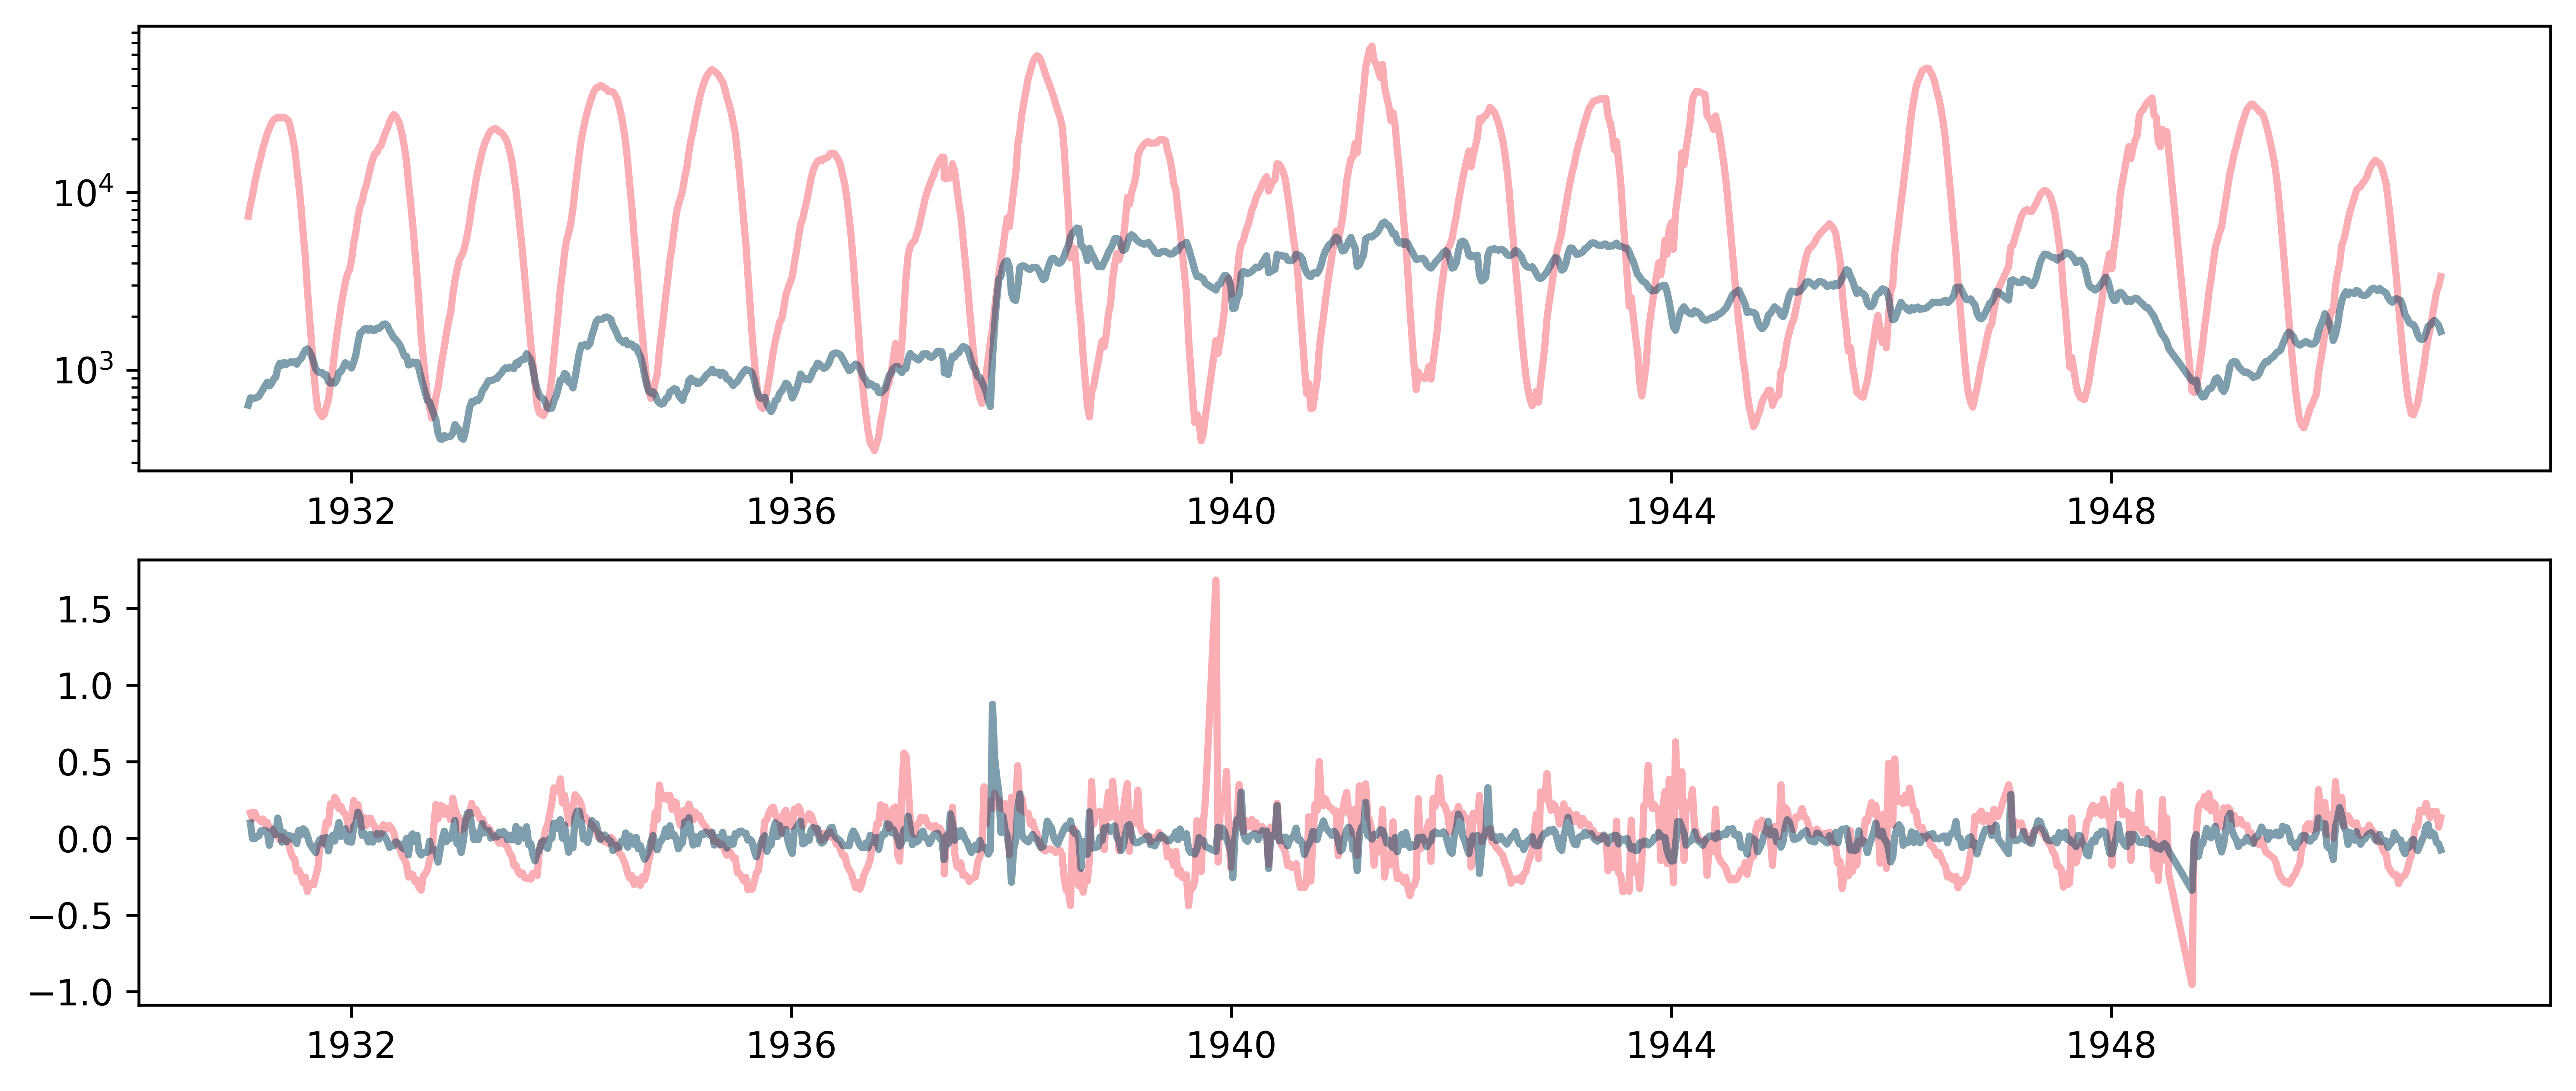

In [11]:
fig = plt.figure(facecolor="w", figsize=(12, 5), dpi=600)
ax1 = fig.add_subplot(211, axisbelow=True)

ax1.plot(df.Date, df.Measles, color=COLORS["I"], alpha=0.5, lw=2, label="Measles")
ax1.plot(df.Date, df.Pertussis, color=COLORS["D"], alpha=0.5, lw=2, label="Pertussis")
ax1.set_yscale("log")

ax2 = fig.add_subplot(212, axisbelow=True, sharex=ax1)
ax2.plot(df.Date, df.Measles.pct_change(), color=COLORS["I"], alpha=0.5, lw=2, label="Measles")
ax2.plot(df.Date, df.Pertussis.pct_change(), color=COLORS["D"], alpha=0.5, lw=2, label="Pertussis")

fig.savefig("granger_causality_example_values.pdf")

In [12]:

delta_percents = df[["Measles", "Pertussis"]].pct_change().dropna().to_numpy()

In [13]:
result = sm.tsa.stattools.grangercausalitytests(delta_percents, maxlag=52)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5706  , p=0.4502  , df_denom=1019, df_num=1
ssr based chi2 test:   chi2=0.5722  , p=0.4494  , df=1
likelihood ratio test: chi2=0.5721  , p=0.4494  , df=1
parameter F test:         F=0.5706  , p=0.4502  , df_denom=1019, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.3019  , p=0.0019  , df_denom=1016, df_num=2
ssr based chi2 test:   chi2=12.6659 , p=0.0018  , df=2
likelihood ratio test: chi2=12.5880 , p=0.0018  , df=2
parameter F test:         F=6.3019  , p=0.0019  , df_denom=1016, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.3477  , p=0.0000  , df_denom=1013, df_num=3
ssr based chi2 test:   chi2=28.2368 , p=0.0000  , df=3
likelihood ratio test: chi2=27.8530 , p=0.0000  , df=3
parameter F test:         F=9.3477  , p=0.0000  , df_denom=1013, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.5944  , p=0.

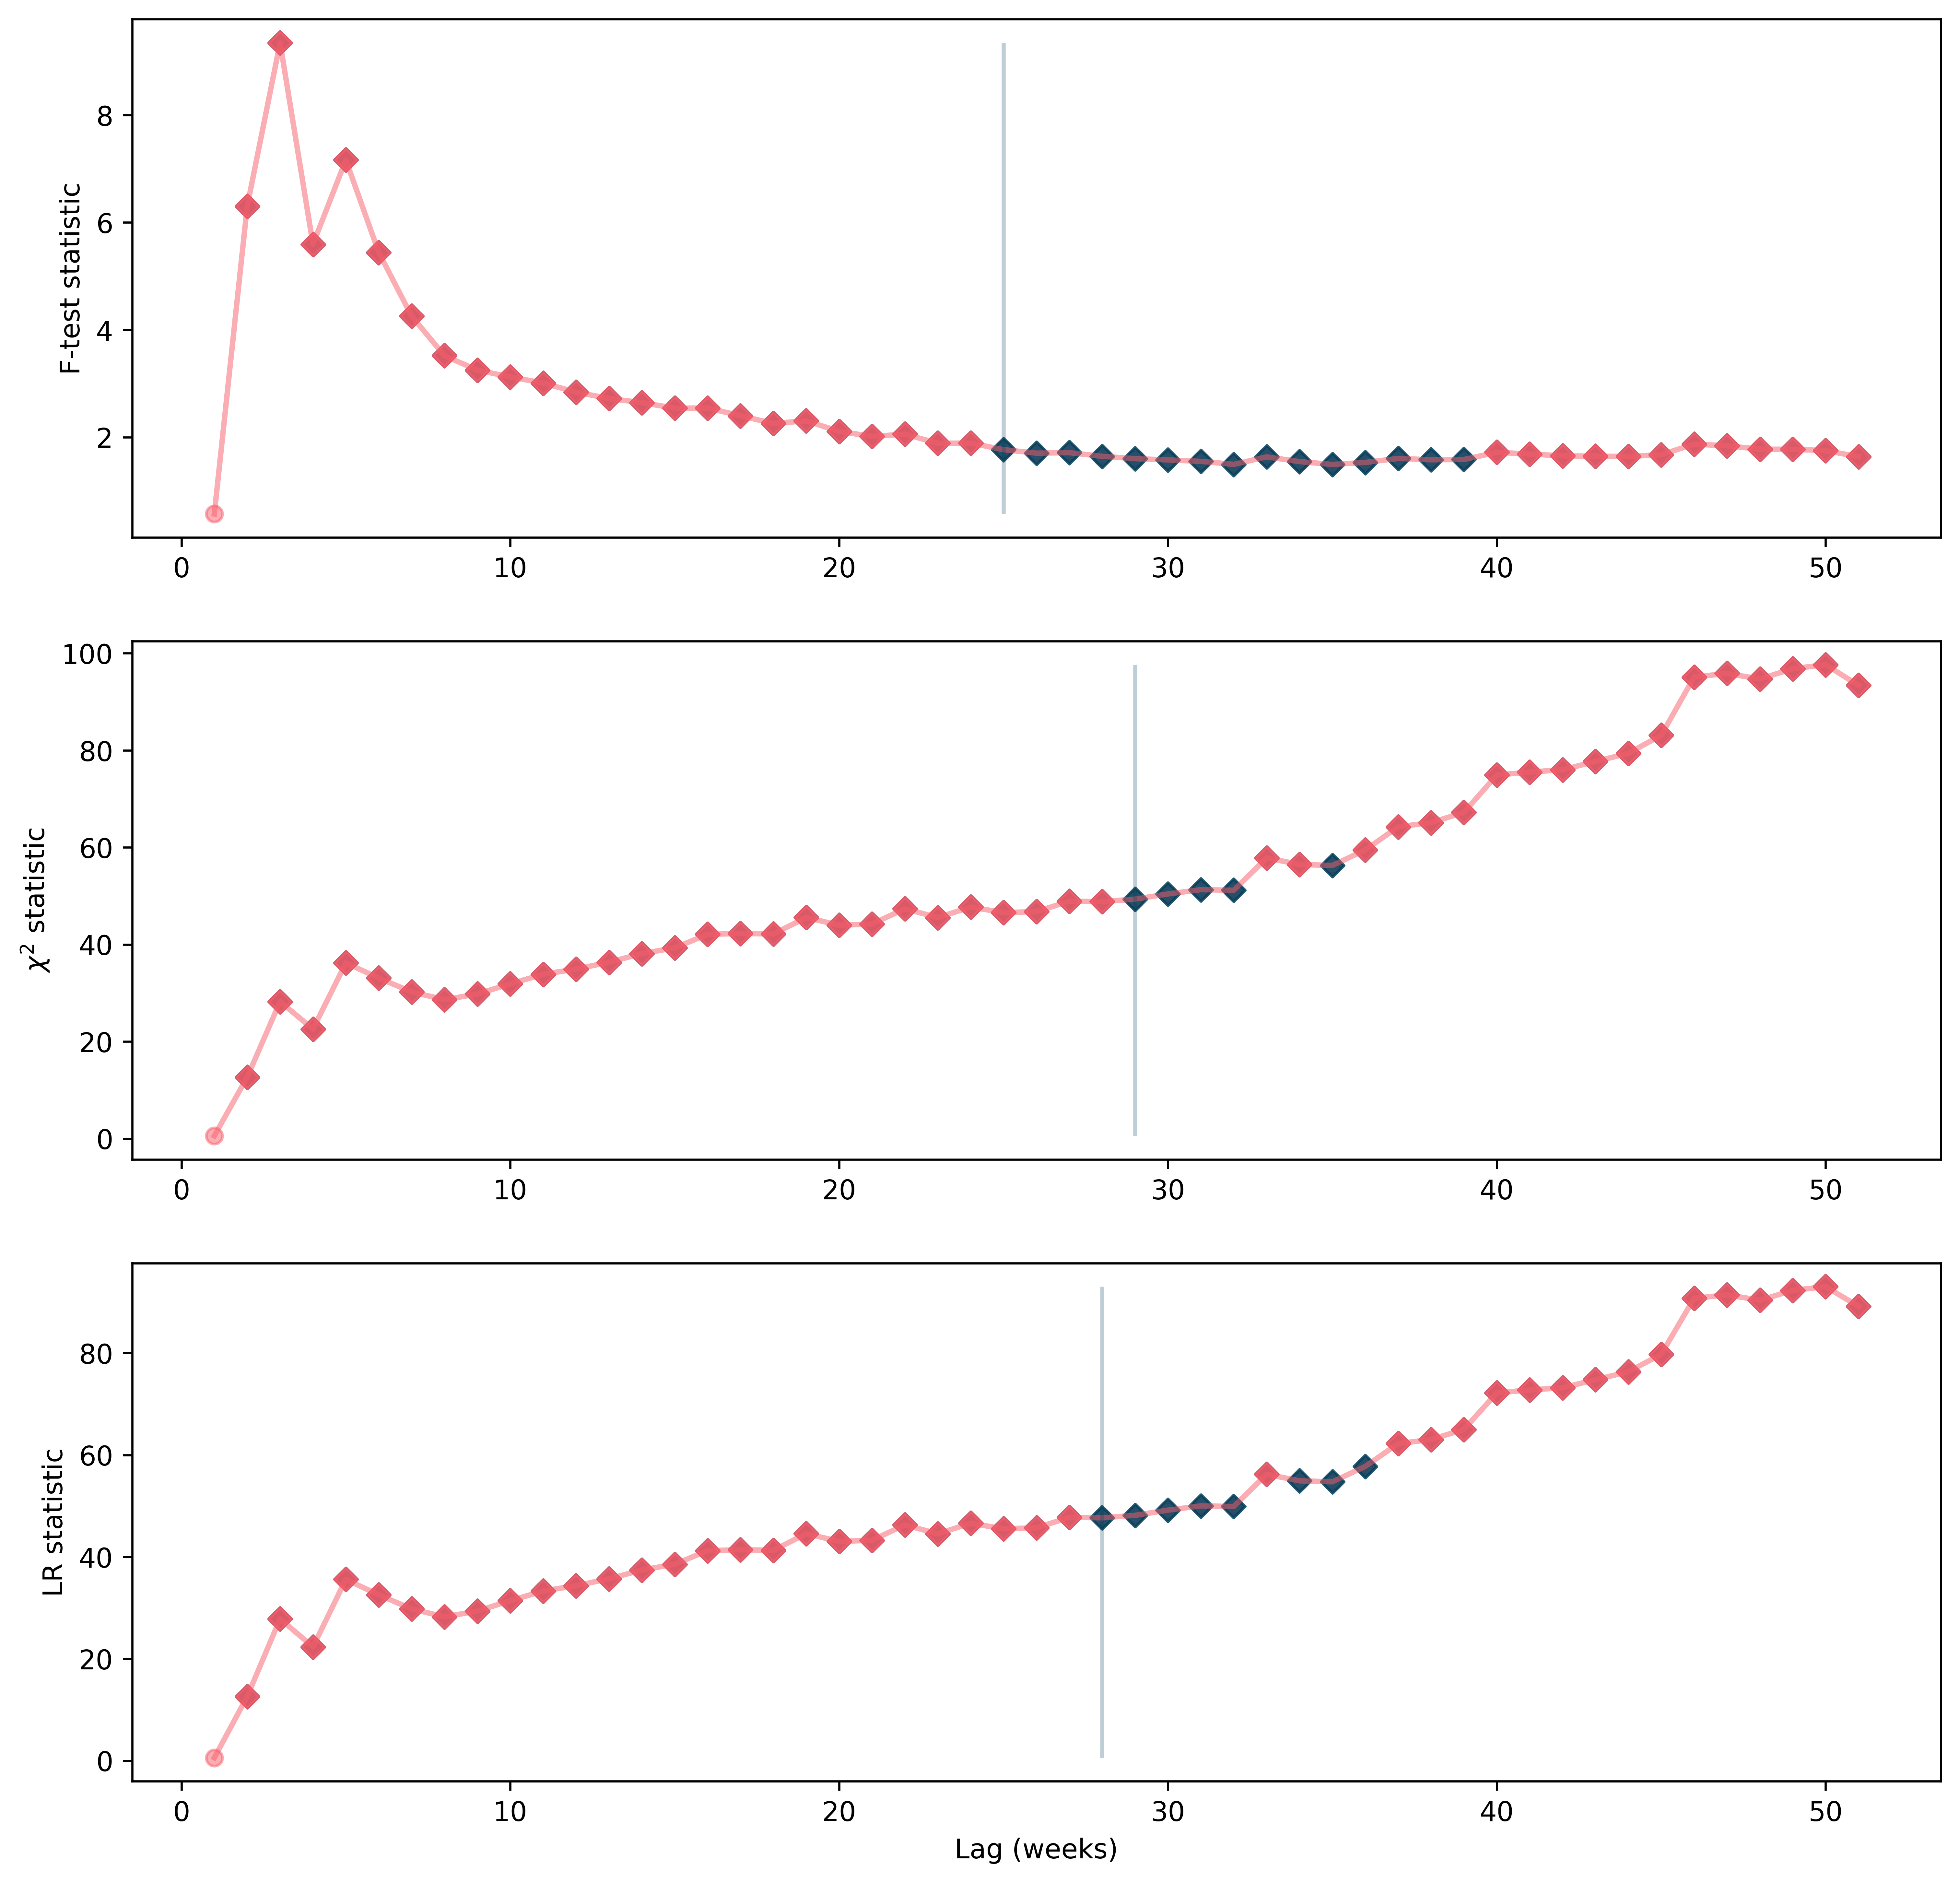

In [14]:
fig = plt.figure(facecolor="w", figsize=(12, 12), dpi=600)
lags = np.arange(1, len(result))

ax1 = fig.add_subplot(311, axisbelow=True)

ax1.plot(lags, [result[i][0]["ssr_ftest"][0] for i in lags], color=COLORS["I"], alpha=0.5, lw=2, label="F-test")
ax1.scatter(lags, [result[i][0]["ssr_ftest"][0] for i in lags], color=COLORS["I"], alpha=0.5)
ax1.scatter([i for i in lags if result[i][0]["ssr_ftest"][1] < 0.05], 
            [result[i][0]["ssr_ftest"][0] for i in lags if result[i][0]["ssr_ftest"][1] < 0.05],
            color=COLORS["D"], alpha=0.85, marker="D")
ax1.scatter([i for i in lags if result[i][0]["ssr_ftest"][1] < 0.01], 
            [result[i][0]["ssr_ftest"][0] for i in lags if result[i][0]["ssr_ftest"][1] < 0.01],
            color=COLORS["I"], alpha=0.85, marker="D")
ax1.set_ylabel("F-test statistic")

ax2 = fig.add_subplot(312, axisbelow=True, sharex=ax1)

ax2.plot(lags, [result[i][0]["ssr_chi2test"][0] for i in lags], color=COLORS["I"], alpha=0.5, lw=2, label="Chi-square test")
ax2.scatter(lags, [result[i][0]["ssr_chi2test"][0] for i in lags], color=COLORS["I"], alpha=0.5)
ax2.scatter([i for i in lags if result[i][0]["ssr_chi2test"][1] < 0.05], 
            [result[i][0]["ssr_chi2test"][0] for i in lags if result[i][0]["ssr_chi2test"][1] < 0.05],
            color=COLORS["D"], alpha=0.85, marker="D")
ax2.scatter([i for i in lags if result[i][0]["ssr_chi2test"][1] < 0.01], 
            [result[i][0]["ssr_chi2test"][0] for i in lags if result[i][0]["ssr_chi2test"][1] < 0.01],
            color=COLORS["I"], alpha=0.85, marker="D")
ax2.set_ylabel("$\chi^2$ statistic")

ax3 = fig.add_subplot(313, axisbelow=True, sharex=ax1)

ax3.plot(lags, [result[i][0]["lrtest"][0] for i in lags], color=COLORS["I"], alpha=0.5, lw=2, label="Chi-square test")
ax3.scatter(lags, [result[i][0]["lrtest"][0] for i in lags], color=COLORS["I"], alpha=0.5)
ax3.scatter([i for i in lags if result[i][0]["lrtest"][1] < 0.05], 
            [result[i][0]["lrtest"][0] for i in lags if result[i][0]["lrtest"][1] < 0.05],
            color=COLORS["D"], alpha=0.85, marker="D")
ax3.scatter([i for i in lags if result[i][0]["lrtest"][1] < 0.01], 
            [result[i][0]["lrtest"][0] for i in lags if result[i][0]["lrtest"][1] < 0.01],
            color=COLORS["I"], alpha=0.85, marker="D")
ax3.set_ylabel("LR statistic")
ax3.set_xlabel("Lag (weeks)")

ax1.vlines(25, min([result[i][0]["ssr_ftest"][0] for i in lags]), max([result[i][0]["ssr_ftest"][0] for i in lags]), color=COLORS["D"], alpha=.25)
ax2.vlines(29, min([result[i][0]["ssr_chi2test"][0] for i in lags]), max([result[i][0]["ssr_chi2test"][0] for i in lags]), color=COLORS["D"], alpha=.25)
ax3.vlines(28, min([result[i][0]["lrtest"][0] for i in lags]), max([result[i][0]["lrtest"][0] for i in lags]), color=COLORS["D"], alpha=.25)

fig.savefig("granger_causality_statistics.pdf")